# Bound State using Conventional Method

Parameters (A, mu, sigma): (3.0, 0.0, 1.0)
Eigenvalues: [-2.07936778 -0.24735441]


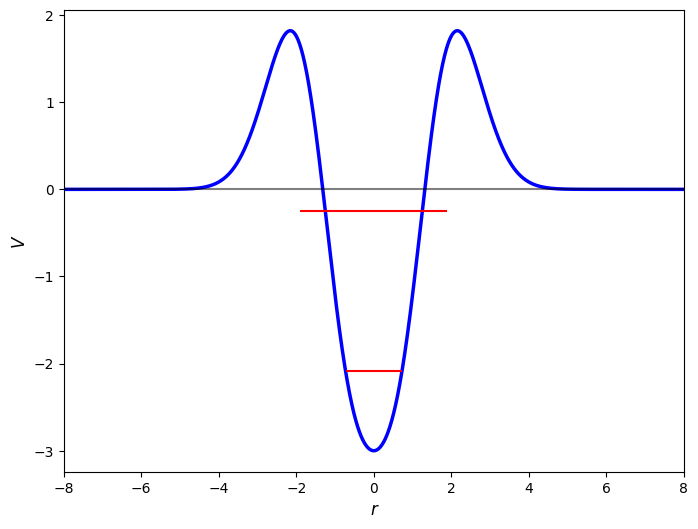

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

# Function to create inverted Gaussian potential
def inverted_gaussian(r, A, mu, sigma):
    return (r**4 -A) * np.exp(-(r - mu)**2 / ( 2*sigma**2))

# Function to diagonalize Hamiltonian
def diagonalize_hamiltonian(H):
    return eigh_tridiagonal(H.diagonal(0), H.diagonal(-1))

# Function to plot the inverted Gaussian potential and bound states
def inverted_gaussian_plot(energies, wavefunctions, r, steps, n, A, mu, sigma):
    plt.figure(figsize=(8, 6))
    plt.plot(r, inverted_gaussian(r, A, mu, sigma),lw=2.5, color="blue", label="Potential")
    for i in range(n):
        plt.hlines(energies[i], -A/2.5*np.sqrt(np.log(-A/energies[i])),A/2.5*np.sqrt(np.log(-A/energies[i])), color = "red" )
        #plt.plot(r, energies[i] + np.abs(wavefunctions[:, i])**2, label=f"Bound State {i+1}")
    plt.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
    plt.xlabel("r", family='sans-serif', fontsize=12, fontstyle='italic')
    plt.ylabel("V", family='sans-serif', fontsize=12, fontstyle='italic')
    plt.xlim(-8,8)
    #plt.ylim(-5.,0.1)
    #plt.title("Gaussian Potential")
    #plt.legend()
    plt.savefig("Rbs"+".png")
    #plt.grid(True)
    plt.show()

# INPUT
########
# Set parameters for the inverted Gaussian potential
A = 3. # Amplitude
mu = 0.0  # Mean
sigma = 1.0  # Standard deviation
steps = 2000  # Number of steps
hbar = 1.0  # Planck's constant
m = 1. # Particle mass

########
# CODE
########
# Create r-vector
rvec = np.linspace(-10*sigma, 10*sigma, steps, dtype=np.float_)
# Get step size
h = rvec[1] - rvec[0]
# Create the potential from inverted Gaussian function
U = inverted_gaussian(rvec, A, mu, sigma)
# Create Laplacian via 3-point finite-difference method
Laplacian = (-2.0 * np.diag(np.ones(steps)) + np.diag(np.ones(steps - 1), 1)
             + np.diag(np.ones(steps - 1), -1)) / (float)(h ** 2)
# Create the Hamiltonian
Hamiltonian = np.zeros((steps, steps))
[i, j] = np.indices(Hamiltonian.shape)
Hamiltonian[i == j] = U
Hamiltonian += (-0.5) * ((hbar ** 2) / m) * Laplacian
# Diagonalize the Hamiltonian yielding the wavefunctions and energies
E, V = diagonalize_hamiltonian(Hamiltonian)
# Determine number of energy levels to plot (n)
n = 0
while E[n] < 0:
    n += 1
# Print output
print("Parameters (A, mu, sigma):", (A, mu, sigma))
print("Eigenvalues:", E[:n])
# Create plot
inverted_gaussian_plot(E, V, rvec, steps, n, A, mu, sigma)

# Bound State using Scattering Theory

In [1]:
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn
#from scipy.special import lambertw as lamb
from scipy.misc import derivative
from scipy.interpolate import CubicSpline as CS
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np

In [225]:
def Vpot(r,V0):
    return (r**4 -V0)*np.exp(-r*r/2)

def rpos(Eval, V0):
    return   np.sqrt(np.log(-V0/Eval))

def odeeqns(r, y, Mr, l, El, V0):
    theta, omega = y
    return [omega, -2.*Mr*(El-Vpot(r,V0))*theta]

In [226]:

Varray = np.loadtxt("F:/Spyder/potential_depths.dat")
y0=[0.,1.]
r=np.linspace(-12.,12.,3000)
rlen = len(r)
Mr=1.
l=0
V0=np.pi**2/8
r_span = (-12.,12.)

In [227]:
V0 = 3.#Varray[140]

In [228]:
ktilde = []
rbsc = []
vbsc = []
Elvls = []
for iEdel in np.linspace(-2000.,0.,num=2000):
    El=iEdel/800+0.001
    Elvls.append(El)
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    rbsc.append(np.real(1j*np.power(pmom,2*l+1)))
    vbsc.append(np.real(1j*np.power(-pmom,2*l+1)))

    usol = solve_ivp(odeeqns, r_span,  y0, t_eval= r, args=(Mr, l, El, V0),)

    #ufunc=CS(usol.t, -usol.y[0])
    Rfunc=CS(usol.t[1:], np.lib.scimath.log(usol.y[0][1:]/usol.t[1:])).derivative()

    #Rvals = Rfunc(usol.t)
    ra = 8.
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    def jnfn(x):
        return jn(l, pmom*x)
    def ynfn(x):
        return yn(l, pmom*x)

    num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
    den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
    ktilde.append(np.real(np.power(pmom,2*l+1)*num/den))
    
Eplvls = np.linspace(0.,100.,num=200)/800.+0.000001

rbsc = np.array(rbsc)
vbsc = np.array(vbsc)
Elvls = np.array(Elvls)

C:\Users\dell\AppData\Local\Temp\ipykernel_27912\3169564353.py:25: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
C:\Users\dell\AppData\Local\Temp\ipykernel_27912\3169564353.py:26: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)


In [229]:
rpsin = CS(Elvls, np.array(ktilde)-rbsc)
vpsin = CS(Elvls, np.array(ktilde)-vbsc)
polE = -10. 
polp = -10.
uwfn = solve_ivp(odeeqns, r_span, y0, t_eval= r, args=(Mr, l, polE, V0),)
penh = 1000.*np.ones((len(Eplvls)))
for sols in rpsin.roots():
    if sols<0:
        if sols>polE:
            polE = sols
            polp = np.real(1j*np.lib.scimath.sqrt(2*Mr*polE))
            uwfn = solve_ivp(odeeqns, r_span, y0, t_eval= r, args=(Mr, l, polE, V0),)
            penh = np.sqrt(np.power(2*Mr*Eplvls,6))/np.power(rpsin(Eplvls),2)
for sols in vpsin.roots():
    if sols<0:
        if sols>polE:
            polE = sols
            polp = np.real(-1j*np.lib.scimath.sqrt(2*Mr*polE))
            uwfn = solve_ivp(odeeqns, r_span,  y0,t_eval= r, args=(Mr, l, polE, V0),)
            penh = np.sqrt(np.power(2*Mr*Eplvls,6))/np.power(vpsin(Eplvls),2)

V0 =  3.0 , PolE =  -0.24719752208656387


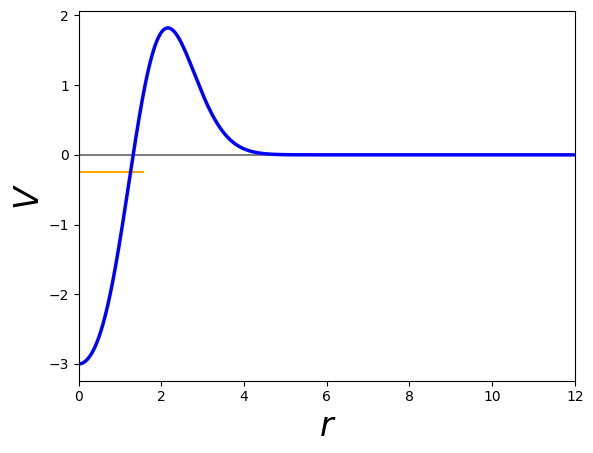

In [230]:
#plt.ylim(-2.0,0.3)
plt.xlim(0, 12.)
plt.xlabel("r",family='sans-serif',fontsize=24,fontstyle='italic')
plt.ylabel("V",family='sans-serif',fontsize=24,fontstyle='italic')
if polp<-0.001:
    plt.hlines(polE, 0.,  rpos(polE,V0), colors="orange", linestyle="-",)  # rpos(polp,V0),'''
elif polp>0.001:
    plt.hlines(-polE, 0., rpos(-polE,V0), colors="magenta", linestyle="-",)  #''' rpos(-polp,V0),'''
plt.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
plt.plot(r, Vpot(r,V0), lw=2.5, color="blue")
print("V0 = " ,V0 , ", PolE = ", polE)

-0.24719752208656387 -0.7031323091517896


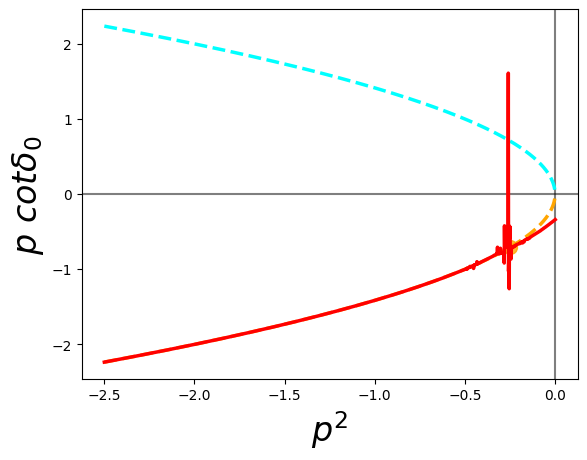

In [231]:
#plt.ylim([-1.50,1.50])
#plt.xlim([-0.38,0.001])
plt.xlabel(r"$p^2$",family='sans-serif',fontsize=24,fontstyle='italic')
plt.ylabel(r"$p~cot\delta_0$",family='sans-serif',fontsize=24,fontstyle='italic')
plt.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
plt.axvline(x=0.0, color='0.0', linestyle='-',alpha=0.5)
plt.plot(Elvls, rbsc, color="orange", linestyle="dashed", lw=2.5)
plt.plot(Elvls, vbsc, color="cyan", linestyle="dashed", lw=2.5)
plt.plot(Elvls, ktilde, lw=2.5, color="red")
if polp<-0.01:
    plt.scatter(np.array([polE]), np.array([polp]), c="orange", s=100, alpha=0.8) 
elif polp>0.01:
    plt.scatter(np.array([polE]), np.array([polp]), c="magenta", s=100, alpha=0.8) 
print(polE,polp)

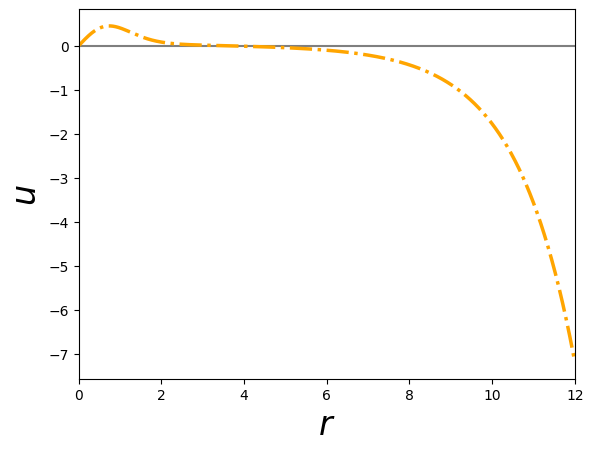

In [217]:
#plt.ylim(-0.1,2.)
plt.xlim(0, 12.)
plt.xlabel("$r$",family='sans-serif',fontsize=24,fontstyle='italic')
plt.ylabel("$u$",family='sans-serif',fontsize=24,fontstyle='italic')
plt.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
#plt.axhline(y=0.74, color='0.0', linestyle='-',alpha=0.5)
if polp<-0.001:
    plt.plot(uwfn.t, uwfn.y[0], lw=2.5, color="orange", linestyle="dashdot")
elif polp>0.001:
    plt.plot(uwfn.t, uwfn.y[0], lw=2.5, color="magenta", linestyle="dashdot")

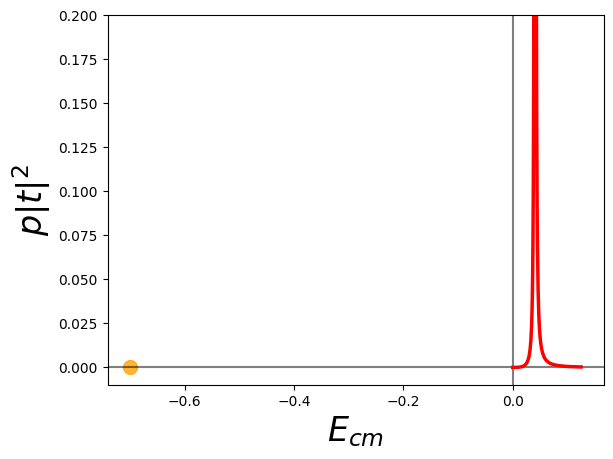

In [37]:
plt.ylim(-0.01,0.2)
#plt.xlim(-0.12, 0.05)
plt.xlabel(r"$E_{cm}$",family='sans-serif',fontsize=24,fontstyle='italic')
plt.ylabel(r"$p|t|^2$",family='sans-serif',fontsize=24,fontstyle='italic')
plt.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
plt.axvline(x=0.0, color='0.0', linestyle='-',alpha=0.5)
if polp<-0.001:
    plt.scatter(np.array([polp]), np.array([0.0]), c="orange", s=100, alpha=0.8) 
    plt.plot(Eplvls, penh, lw=2.5, color="red")
elif polp>0.001:
    plt.plot(Eplvls, penh, lw=2.5, color="red")
    plt.scatter(np.array([-polp]), np.array([0.0]), c="magenta", s=100, alpha=0.8)

C:\Users\dell\AppData\Local\Temp\ipykernel_19588\3430189585.py:40: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
C:\Users\dell\AppData\Local\Temp\ipykernel_19588\3430189585.py:41: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
C:\Users\dell\AppData\Local\Temp\ipykernel_19588\3430189585.py:43: DeprecationWarning: scipy.arctan is deprecated and will be removed in SciPy 2.0.0, use numpy.arctan instead
  x = sy.arctan(np.real(den/num))


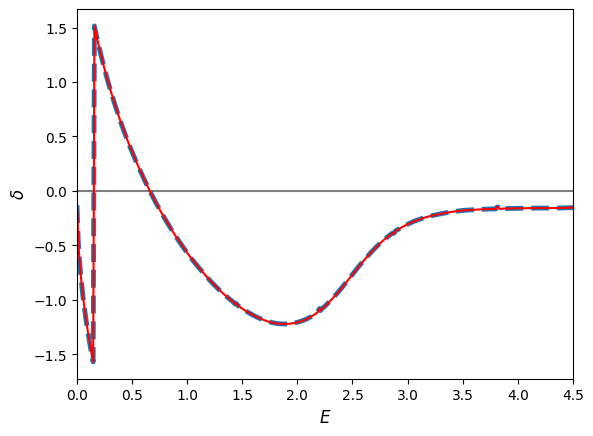

In [280]:
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn
from scipy.misc import derivative
from scipy.interpolate import CubicSpline as CS
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import scipy as sy
def Vpot(r,V0):
    return (r**4 -V0)*np.exp(-r*r/2.)
def odeeqns(r, y, Mr, l, El, V0):
    theta, omega = y
    return [omega, -2.*Mr*(El-(Vpot(r,V0) + l*(l+1)/r/r/(2*Mr)))*theta]
y0=[0.,1.]
r=np.linspace(0.001,12.,1500)
Mr=1.
l=0
r_span = (0.001,12.)
V0 = 3.
k = []
Elvls = []
delta = []
for iEdel in np.linspace(0,3600.,num=400):
    El=iEdel/800.+0.001
    Elvls.append(El)

    usol = solve_ivp(odeeqns, r_span,  y0, t_eval= r, args=(Mr, l, El, V0),)

    
    Rfunc=CS(usol.t[1:], np.lib.scimath.log(usol.y[0][1:]/usol.t[1:])).derivative()

  
    ra = 8.
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    def jnfn(x):
        return jn(l, pmom*x)
    def ynfn(x):
        return yn(l, pmom*x)

    num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
    den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
    k.append(pmom)
    x = sy.arctan(np.real(den/num))
    delta.append(x)    

delta = np.array(delta)
Elvls = np.array(Elvls)
plt.xlim(0.,4.5)
plt.plot(Elvls, delta, lw=3.5, ls= "--")
p= CS(Elvls, delta)
plt.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
plt.xlabel("E", family='sans-serif', fontsize=12, fontstyle='italic')
plt.ylabel("$\delta$", family='sans-serif', fontsize=12, fontstyle='italic')
plt.plot(Elvls, p(Elvls), c="red")

# Resonances

In [238]:
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn
#from scipy.special import lambertw as lamb
from scipy.misc import derivative
from scipy.interpolate import CubicSpline as CS
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import scipy as sy
import pandas as pd

In [239]:
def Vpot(r,V0):
    return (r**4 -V0)*np.exp(-r*r/2.)   #-V0*np.exp(-(r)**2) + 2*np.exp(-(r))   -V0*np.exp(-r*r/2) + np.exp(r)                                               

def rpos(Eval, V0):
    return   np.sqrt(np.log(-V0/Eval))

def odeeqns(r, y, Mr, l, El, V0):
    theta, omega = y
    return [omega, -2.*Mr*(El-(Vpot(r,V0) + l*(l+1)/r/r/(2*Mr)))*theta]

In [240]:
#Varray = np.loadtxt("F:/Spyder/potential_depths.dat")
y0=[0.,1.]
r=np.linspace(0.001,12.,1500)
Mr=1.
l=0
r_span = (0.001,12.)

In [241]:
V0 = 3.#Varray[140]

In [242]:
k = []
Elvls = []
delta = []
for iEdel in np.linspace(0,3600.,num=400):
    El=iEdel/800.+0.001
    Elvls.append(El)

    usol = solve_ivp(odeeqns, r_span,  y0, t_eval= r, args=(Mr, l, El, V0),)

    #ufunc=CS(usol.t, -usol.y[0])
    Rfunc=CS(usol.t[1:], np.lib.scimath.log(usol.y[0][1:]/usol.t[1:])).derivative()

    #Rvals = Rfunc(usol.t)
    ra = 8.
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    def jnfn(x):
        return jn(l, pmom*x)
    def ynfn(x):
        return yn(l, pmom*x)

    num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
    den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
    k.append(pmom)
    x = sy.arctan(np.real(den/num))
    delta.append(x)    #np.where(x < 0, np.pi + x, x)) 

delta = np.array(delta)
Elvls = np.array(Elvls)

C:\Users\dell\AppData\Local\Temp\ipykernel_19588\488662279.py:21: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
C:\Users\dell\AppData\Local\Temp\ipykernel_19588\488662279.py:22: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
C:\Users\dell\AppData\Local\Temp\ipykernel_19588\488662279.py:24: DeprecationWarning: scipy.arctan is deprecated and will be removed in SciPy 2.0.0, use numpy.arctan instead
  x = sy.arctan(np.real(den/num))


In [243]:


d1 = delta[:14] + np.pi 
d2 = delta[14:]
delta = np.concatenate((d1, d2))


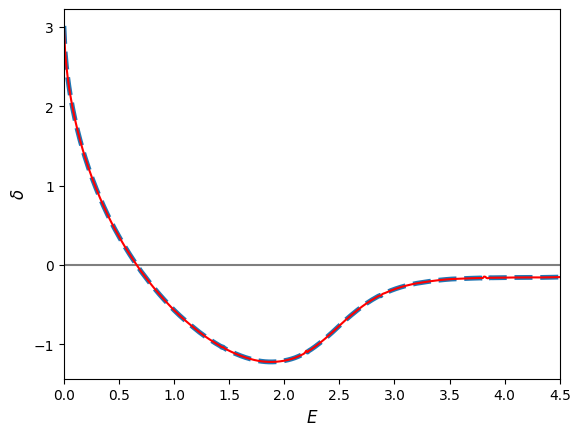

In [247]:
#plt.ylim(0,3.2)
plt.xlim(0.,4.5)
plt.plot(Elvls, delta, lw=3.5, ls= "--")
#plt.grid()
p= CS(Elvls, delta)
#plt.xlim(1.8,4.6)
#plt.ylim(-1.2,0.0)
plt.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
plt.xlabel("E", family='sans-serif', fontsize=12, fontstyle='italic')
plt.ylabel("$\delta$", family='sans-serif', fontsize=12, fontstyle='italic')
plt.plot(Elvls, p(Elvls), c="red")
#plt.savefig("PS"+".png")

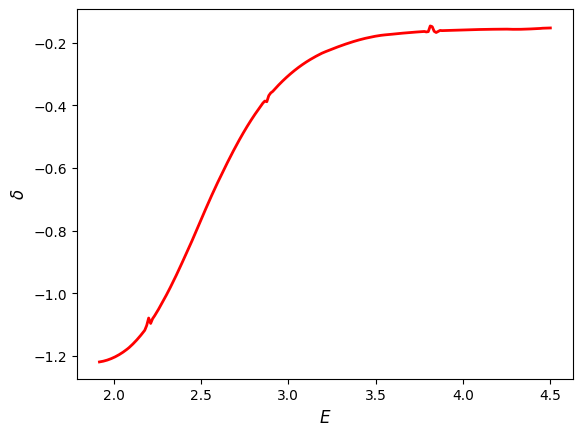

In [254]:
plt.plot(Elvls[170:400:1],p(Elvls[170:400:1]), lw = 2, alpha = 1, c="red")
plt.xlabel("E", family='sans-serif', fontsize=12, fontstyle='italic')
plt.ylabel("$\delta$", family='sans-serif', fontsize=12, fontstyle='italic')
#plt.savefig("Glitch_PS"+".png")

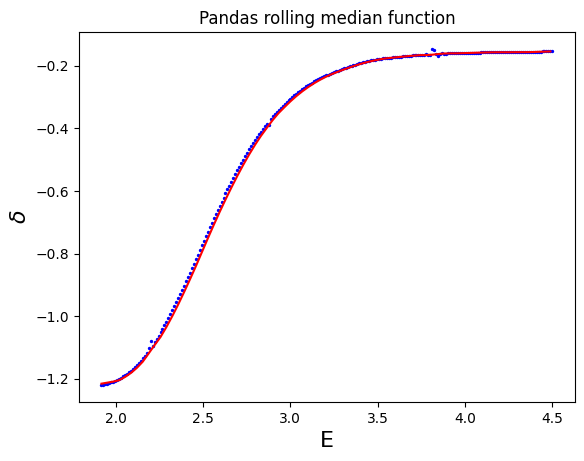

In [297]:
d = CS(Elvls, delta)
plt.scatter(Elvls[170:400:1],d(Elvls[170:400:1]), c= "b", s=2 )
window_size = 6

t = 3
smoothed_y = pd.Series(d(Elvls[170:400:t])).rolling(window=window_size, min_periods=3, center=True).median()
smoothed_y = np.array(smoothed_y)

plt.title("Pandas rolling median function")
plt.xlabel("E", fontsize = 16)
plt.ylabel(r"$\delta$", fontsize = 16)
plt.plot(Elvls[170:400:t],smoothed_y, c = "red", alpha = 1.)
#plt.savefig("RMPS"+".png")

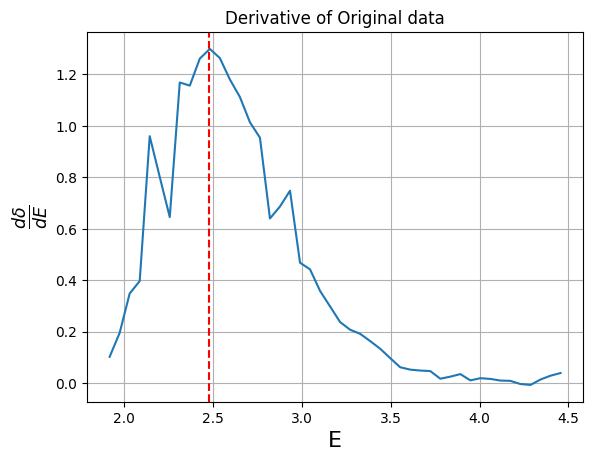

In [296]:
k=np.array(k)
beta = 1/(CS(Elvls[170:400:5],delta[170:400:5]).derivative()(Elvls[170:400:5]))                                 #(np.diff(delta[165:400]))

plt.title("Derivative of Original data")
plt.xlabel("E", fontsize = 16)
plt.ylabel(r"$\frac{d\delta}{dE}$", fontsize = 18)
plt.plot(Elvls[170:400:5],1/beta)
plt.axvline(x=2.477, ls="--", c = "red")
plt.grid()
#plt.xlim(2.1,2.6)
#plt.savefig("DPG"+".png")

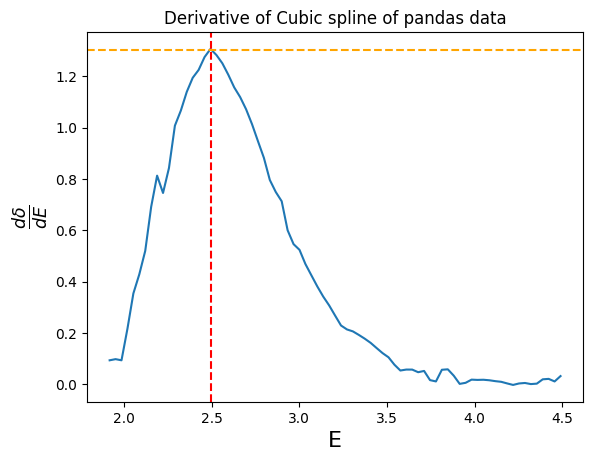

In [295]:
delta_spline = CS(Elvls[170:400:t],smoothed_y).derivative()

plt.title("Derivative of Cubic spline of pandas data")
plt.xlabel("E", fontsize = 16)
plt.ylabel(r"$\frac{d\delta}{dE}$", fontsize = 18)
plt.plot(Elvls[170:400:t], delta_spline(Elvls[170:400:t]))
plt.axvline(x=2.495, ls="--", c = "red")
plt.axhline(y=1.3, ls="--", c = "orange")
#plt.savefig("DRMP"+".png")

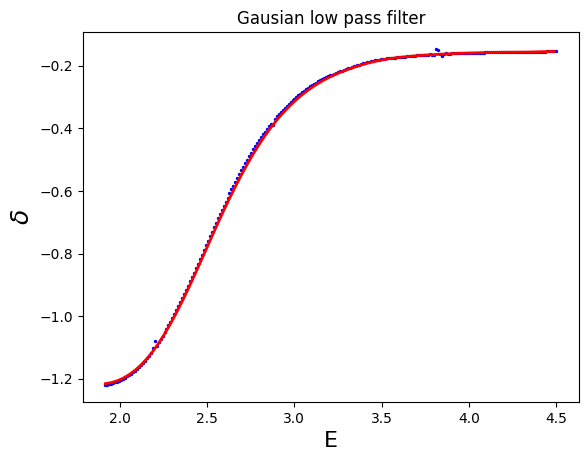

In [294]:
from scipy.ndimage import gaussian_filter1d
sigma = 2
t1 = 3
smoothed_y1 = gaussian_filter1d(d(Elvls[130:400:t1]), sigma=sigma)
smoothed_y1 = np.array(smoothed_y1)

plt.title("Gausian low pass filter")
plt.xlabel("E", fontsize = 16)
plt.ylabel(r"$\delta$", fontsize = 18)

plt.scatter(Elvls[170:400:1], d(Elvls[170:400:1]), c = "blue", s= 2 )
plt.plot(Elvls[170:400:t1], smoothed_y1[13:],c = "red", lw = 2)
#plt.savefig("GLPS" +".png")

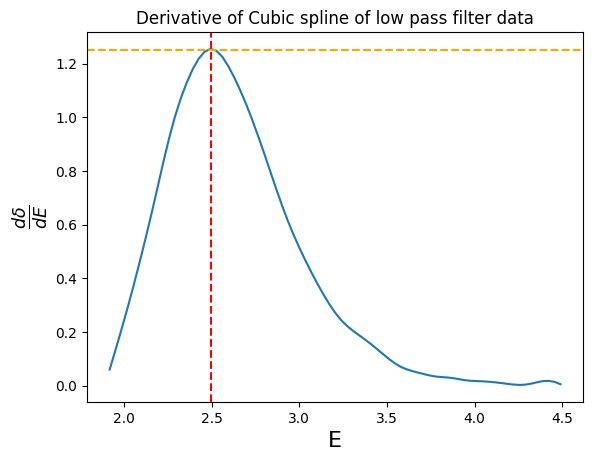

In [293]:
delta_spline1 = CS(Elvls[170:400:t1],smoothed_y1[13:]).derivative()

plt.title("Derivative of Cubic spline of low pass filter data")
plt.xlabel("E", fontsize = 16)
plt.ylabel(r"$\frac{d\delta}{dE}$", fontsize = 18)
plt.plot(Elvls[170:400:t], delta_spline1(Elvls[170:400:t1]))
plt.axvline(x=2.494, ls="--", c = "red")
plt.axhline(y=1.249, ls="--", c = "orange")
#plt.savefig("DGLP"+".png")

Barton Zwiebach's method
using the phase shift smoothened by gaussian low pass filter:



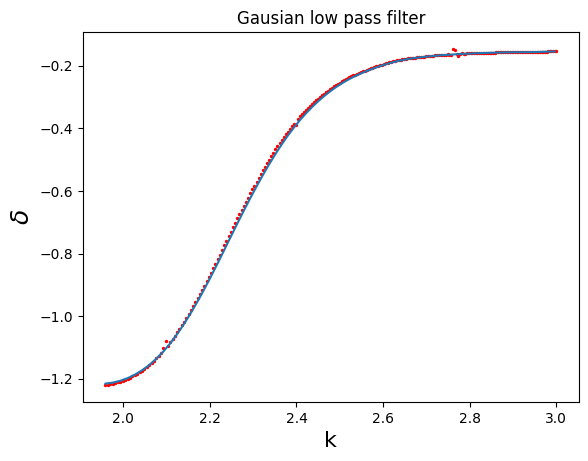

In [268]:
sigma = 2
t1 = 3
smoothed_y1 = gaussian_filter1d((delta[130:400:t1]), sigma=sigma)
smoothed_y1 = np.array(smoothed_y1)

plt.title("Gausian low pass filter")
plt.xlabel("k", fontsize = 16)
plt.ylabel(r"$\delta$", fontsize = 18)
plt.plot(k[170:400:t1], smoothed_y1[13:])
plt.scatter(k[170:400:1], delta[170:400:1], c = "red", s = 2 )

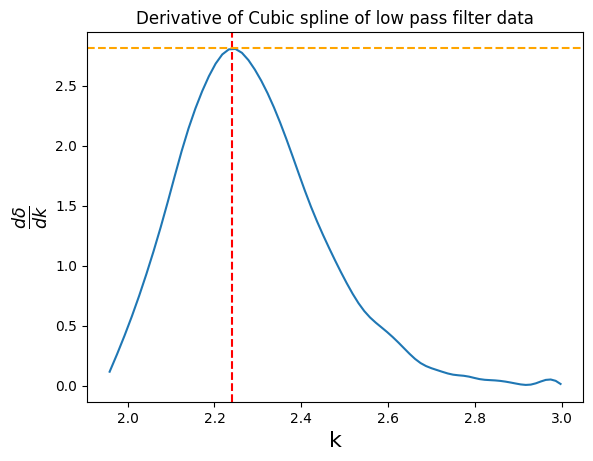

In [279]:
delta_spline1 = CS(k[170:400:t1],smoothed_y1[13:]).derivative()

plt.title("Derivative of Cubic spline of low pass filter data")
plt.xlabel("k", fontsize = 16)
plt.ylabel(r"$\frac{d\delta}{dk}$", fontsize = 18)
plt.plot(k[170:400:t], delta_spline1(k[170:400:t1]))
plt.axvline(x=2.24, ls="--", c = "red")
plt.axhline(y=2.81, ls="--", c = "orange")

In [285]:
a = 2.24
b = 1/2.81
gamma = 2.*a*b*hbar**2/Mr
gamma

1.5943060498220643

In [286]:
E = hbar**2*a**2/2/Mr
E

2.5088000000000004

# Junk

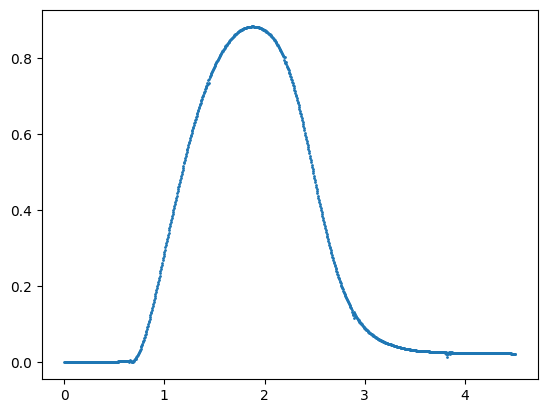

In [192]:
p = np.sin(delta)
p = p*p
p= np.array(p)
p1 = p[850:]-0.023
p2 = p[150:]
p = np.concatenate((p1[::-1], p2))
len(p)
plt.scatter(Elvls, p, s = 1)

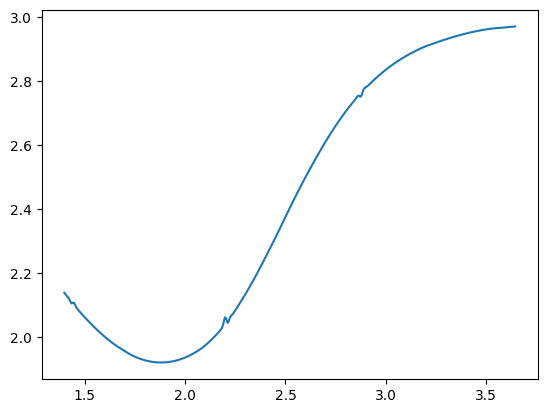

In [310]:
plt.plot(Elvls[310:810],d(Elvls[310:810]) +np.pi )

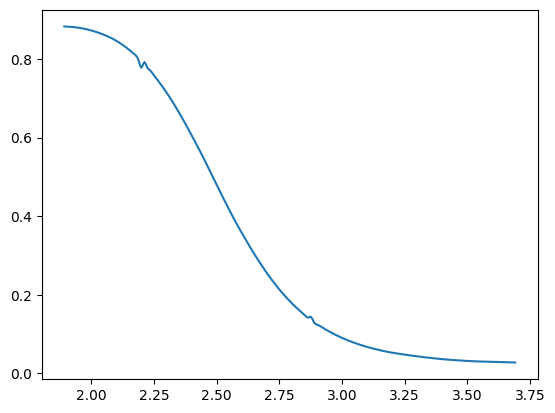

In [308]:
p = np.sin(d(Elvls[420:820]))
p=p*p
plt.plot(Elvls[420:820],np.array(p))

In [193]:
from scipy.optimize import curve_fit

def breit_wigner(E, E0, gamma):
    return (1/4.) * (gamma/2) / ((E - E0)**2 + (gamma/2)**2)

initial_guess = [1., 0.1]

params, covariance = curve_fit(breit_wigner, Elvls, p , p0=initial_guess)

E0_fit, gamma_fit = params

print("E0:", E0_fit)
print("gamma:", gamma_fit)

E0: 1.856752824677429
gamma: 0.6120101292666664


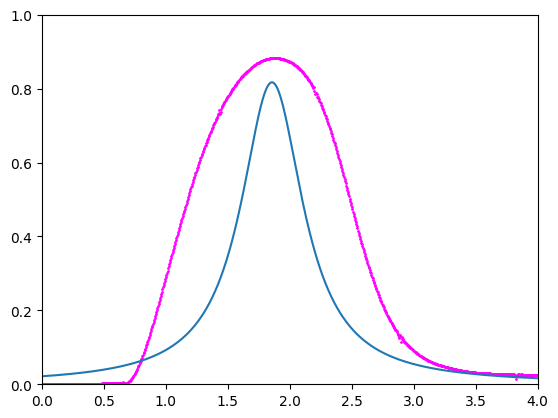

In [194]:
plt.xlim(0,4)
plt.ylim(0,1)
plt.plot(Elvls, breit_wigner(Elvls, params[0], params[1]))
#plt.axvline(x=E0_fit, c = "red", alpha=0.5)
#plt.axhline(y=0.5, c = "green", alpha=0.5)
plt.scatter(Elvls, p, s = 1, c="magenta")

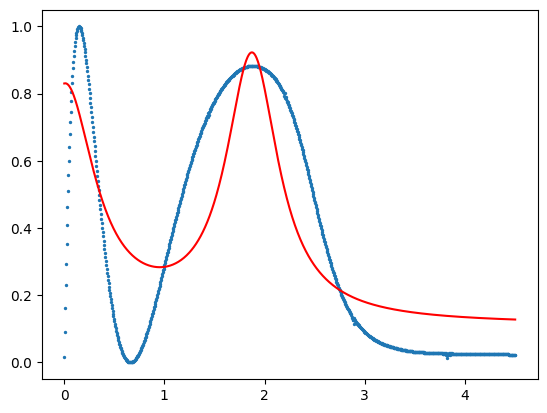

E0_1: 0.0087882298613535
Gamma_1: 0.7177928744869144
E0_2: 1.8750900768462966
Gamma_2: 0.6361520023236422


In [162]:


def double_breit_wigner(E, E0_1, gamma_1, E0_2, gamma_2, A):
    return (1/4.) * ((gamma_1/2) / ((E - E0_1)**2 + (gamma_1/2)**2) + 
                     (gamma_2/2) / ((E - E0_2)**2 + (gamma_2/2)**2)) + A

p = np.sin(delta)
p= p*p
x_data = Elvls
y_data = p


popt, pcov = curve_fit(double_breit_wigner, x_data, y_data, p0=[0.1, 0.01, 2.5, 1.5, 1.0])  # Initial guess for parameters


plt.scatter(x_data, y_data, s=2)
plt.plot(x_data, double_breit_wigner(x_data, *popt), color='red')
plt.show()



print("E0_1:", popt[0])
print("Gamma_1:", popt[1])
print("E0_2:", popt[2])
print("Gamma_2:", popt[3])



In [416]:
def Vpot(r,V0):
    return -V0*np.exp(-(r)**2) + 2*np.exp(-(r))           #(r**4 -V0)*np.exp(-r*r/1.1)
r=np.linspace(0.001,12.,1500)

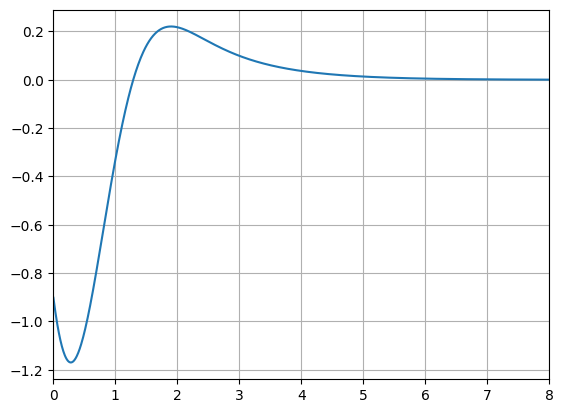

In [417]:
plt.xlim(0,8)
plt.plot(r, Vpot(r,2.9))
plt.grid()

In [118]:
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn
#from scipy.special import lambertw as lamb
from scipy.misc import derivative
from scipy.interpolate import CubicSpline as CS
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import scipy as sy

In [119]:
def Vpot(r,V0):
    return (r**4 -V0)*np.exp(-r*r/2.)   #-V0*np.exp(-(r)**2) + 2*np.exp(-(r))   -V0*np.exp(-r*r/2) + np.exp(r)                                               

def rpos(Eval, V0):
    return   np.sqrt(np.log(-V0/Eval))

def odeeqns(r, y, Mr, l, El, V0):
    theta, omega = y
    return [omega, -2.*Mr*(El-(Vpot(r,V0) + l*(l+1)/r/r/(2*Mr)))*theta]

In [120]:
Varray = np.loadtxt("F:/Spyder/potential_depths.dat")
y0=[0.,1.]
r=np.linspace(0.001,12.,1500)
rlen = len(r)
Mr=1.
l=0
V0=np.pi**2/8
r_span = (0.001,12.)

In [121]:
V0 = 3.#Varray[140]

In [179]:
k = []
Elvls = []
delta1 = []
for iEdel in np.linspace(0,3600.,num=400):
    El=iEdel/800.+0.001
    Elvls.append(El)

    usol = solve_ivp(odeeqns, r_span,  y0, t_eval= r, args=(Mr, l, El, V0),)

    #ufunc=CS(usol.t, -usol.y[0])
    Rfunc=CS(usol.t[1:], np.lib.scimath.log(usol.y[0][1:]/usol.t[1:])).derivative()

    #Rvals = Rfunc(usol.t)
    ra = 8.
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    def jnfn(x):
        return jn(l, pmom*x)
    def ynfn(x):
        return yn(l, pmom*x)

    num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
    den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
    k.append(pmom)
    x = sy.arctan(den/num)
    delta1.append(x)#np.where(x < 0, np.pi + x, x)) 


Elvls = np.array(Elvls)

C:\Users\dell\AppData\Local\Temp\ipykernel_10388\1570072457.py:21: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
C:\Users\dell\AppData\Local\Temp\ipykernel_10388\1570072457.py:22: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
C:\Users\dell\AppData\Local\Temp\ipykernel_10388\1570072457.py:24: DeprecationWarning: scipy.arctan is deprecated and will be removed in SciPy 2.0.0, use numpy.arctan instead
  x = sy.arctan(den/num)


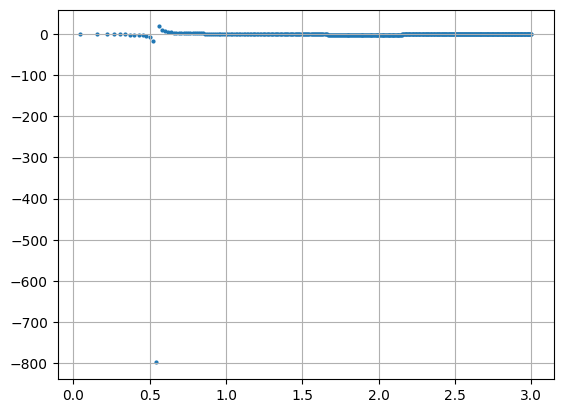

In [180]:

plt.scatter(k, np.tan(delta1), s=4)
plt.grid()

In [159]:
ktilde = []
rbsc = []
vbsc = []
Elvls = []
for iEdel in np.linspace(0,3600.,num=400):
    El=iEdel/800.+0.001
    Elvls.append(El)
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    rbsc.append(1j*np.power(pmom,2*l+1))
    vbsc.append(1j*np.power(-pmom,2*l+1))

    usol = solve_ivp(odeeqns, r_span,  y0, t_eval= r, args=(Mr, l, El, V0),)

    #ufunc=CS(usol.t, -usol.y[0])
    Rfunc=CS(usol.t[1:], np.lib.scimath.log(usol.y[0][1:]/usol.t[1:])).derivative()

    #Rvals = Rfunc(usol.t)
    ra = 8.
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    def jnfn(x):
        return jn(l, pmom*x)
    def ynfn(x):
        return yn(l, pmom*x)

    num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
    den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
    ktilde.append(np.power(pmom,2*l+1)*num/den)
    
Eplvls = np.linspace(0.,100.,num=200)/800.+0.000001

rbsc = np.array(rbsc)
vbsc = np.array(vbsc)
Elvls = np.array(Elvls)

C:\Users\dell\AppData\Local\Temp\ipykernel_10388\3209792550.py:25: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
C:\Users\dell\AppData\Local\Temp\ipykernel_10388\3209792550.py:26: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)


In [160]:
rpsin = CS(Elvls, np.array(ktilde)-rbsc)
vpsin = CS(Elvls, np.array(ktilde)-vbsc)

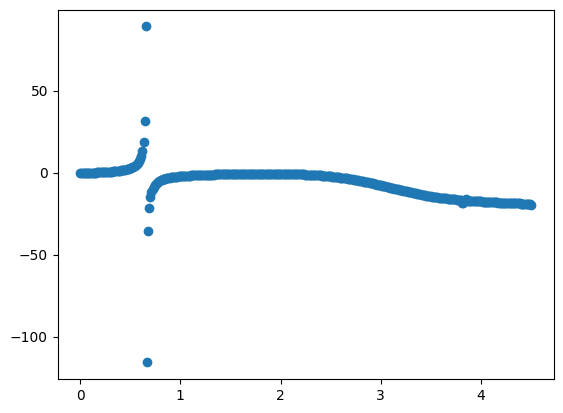

In [183]:
plt.scatter(Elvls, vpsin(Elvls))

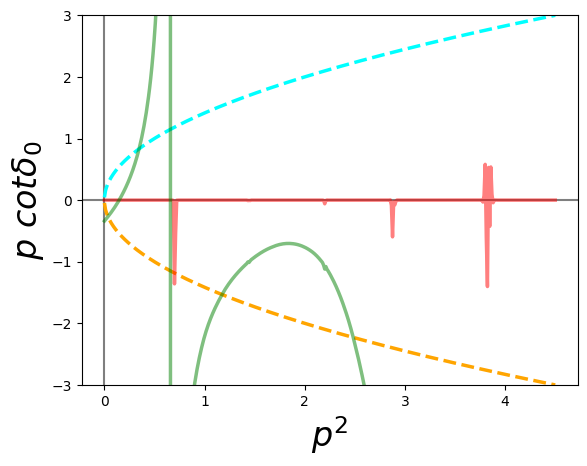

In [184]:
plt.ylim([-3,3])
#plt.xlim([-0.05,0.001])
plt.xlabel(r"$p^2$",family='sans-serif',fontsize=24,fontstyle='italic')
plt.ylabel(r"$p~cot\delta_0$",family='sans-serif',fontsize=24,fontstyle='italic')
plt.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
plt.axvline(x=0.0, color='0.0', linestyle='-',alpha=0.5)
plt.plot(Elvls, 1j*rbsc, color="orange", linestyle="dashed", lw=2.5)
plt.plot(Elvls, 1j*vbsc, color="cyan", linestyle="dashed", lw=2.5)
plt.plot(Elvls, np.imag(ktilde), lw=2.5, color="red", alpha = 0.5)
plt.plot(Elvls, np.real(ktilde), lw=2.5, color="green", alpha = 0.5)

# Histogram Method

In [314]:
import numpy as np
import matplotlib.pyplot as plt

box_sizes = np.linspace(8, 25, 200) 
N = 1000  # Number of grid points
hbar = 1
V0 = 3 

def V(r):
    return -10 + (r**4 - V0) * np.exp(-r**2 / 2.)


def compute_scattering_energies(L):
    dx = L / N  #Grid spacing
    r_values = np.linspace(0, L, N)
    diagonal_elements = np.full(N, 2 / (dx ** 2)) + V(r_values)
    off_diagonal_elements = np.full(N - 1, -1 / (dx ** 2))
    H = np.diag(diagonal_elements) + np.diag(off_diagonal_elements, k=1) + np.diag(off_diagonal_elements, k=-1)
    H[0, -1] = H[-1, 0] = -1 / (dx ** 2)  

    eigenvalues, _ = np.linalg.eigh(H)
    
 
    scattering_energies = eigenvalues[eigenvalues < 0]
    return scattering_energies[:20] 


scattering_energy_points = []
for L in box_sizes:
    energies = compute_scattering_energies(L)
    scattering_energy_points.append(energies)





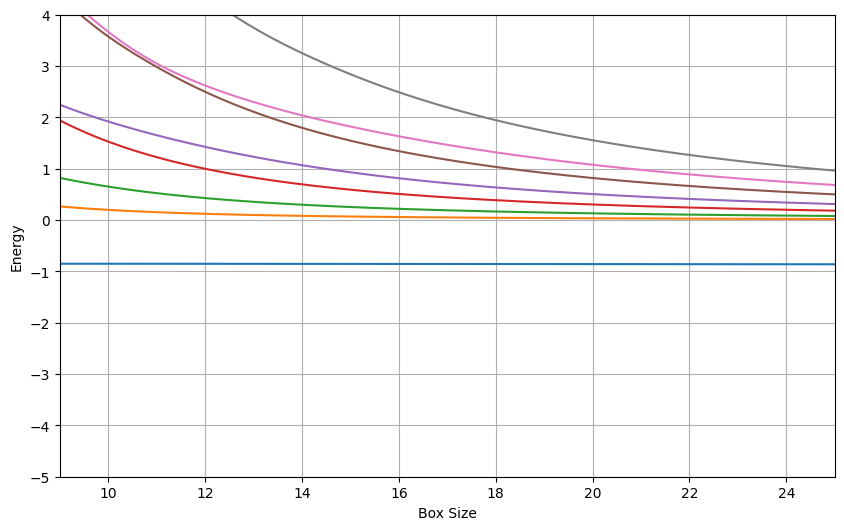

In [322]:
plt.figure(figsize=(10, 6))
for i in range(8):  
    energy_points = [energies[i] for energies in scattering_energy_points]
    plt.plot(box_sizes, 10+ np.array(energy_points))#, marker='o', label=f'Energy {i+1}')
plt.xlabel("Box Size")
plt.ylabel("Energy")
plt.grid(True)
plt.ylim(-5,4)
plt.xlim(9,25)
plt.show()

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

# Function to create inverted Gaussian potential
def inverted_gaussian(r, A, mu, sigma):
    return -100+ (r**4 -A) * np.exp(-(r - mu)**2 / ( 2*sigma**2))

# Function to diagonalize Hamiltonian
def diagonalize_hamiltonian(H):
    return eigh_tridiagonal(H.diagonal(0), H.diagonal(-1))

def determine_parity(wavefunction):
    # Check if the wavefunction changes sign around the center
    if np.sign(wavefunction[0]) != np.sign(wavefunction[-1]):
        return "odd"
    else:
        return "even"

 # INPUT
########
# Set parameters for the inverted Gaussian potential
A = 3. # Amplitude
mu = 0.0  # Mean
sigma = 1.0  # Standard deviation
steps = 2000  # Number of steps
hbar = 1.0  # Planck's constant
m = 1. # Particle mass


   
def Energy_states(L):
    # Create r-vector
    rvec = np.linspace(-L, L, steps, dtype=np.float_)
    # Get step size
    h = rvec[1] - rvec[0]
    # Create the potential from inverted Gaussian function
    U = inverted_gaussian(rvec, A, mu, sigma)
    # Create Laplacian via 3-point finite-difference method
    Laplacian = (-2.0 * np.diag(np.ones(steps)) + np.diag(np.ones(steps - 1), 1)
                 + np.diag(np.ones(steps - 1), -1)) / (float)(h ** 2)
    Laplacian[0, -1] = 0 #1.0 / (h ** 2)
    Laplacian[-1, 0] = 0 #1.0 / (h ** 2)
    # Create the Hamiltonian
    Hamiltonian = np.zeros((steps, steps))
    [i, j] = np.indices(Hamiltonian.shape)
    Hamiltonian[i == j] = U
    Hamiltonian += (-0.5) * ((hbar ** 2) / m) * Laplacian
    # Diagonalize the Hamiltonian yielding the wavefunctions and energies
    E, V = diagonalize_hamiltonian(Hamiltonian)
    parity = [determine_parity(wavefunction) for wavefunction in V.T]
    return E, parity

box_size = np.linspace(8., 25., 200)
V_odd_energy_points = []
V_even_energy_points = []
for L in box_size:
    energies, parity = Energy_states(L)
    odd_energies = [energies[i] for i in range(len(energies)) if parity[i] == "odd"]
    even_energies = [energies[i] for i in range(len(energies)) if parity[i] == "even"]
    V_odd_energy_points.append(odd_energies)
    V_even_energy_points.append(even_energies)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

# Function to create inverted Gaussian potential
def inverted_gaussian(r, A, mu, sigma):
    return -100+ ((r**4 -A) * np.exp(-(r - mu)**2 / ( 2*sigma**2)))*0.

# Function to diagonalize Hamiltonian
def diagonalize_hamiltonian(H):
    return eigh_tridiagonal(H.diagonal(0), H.diagonal(-1))

def determine_parity(wavefunction):
    # Check if the wavefunction changes sign around the center
    if np.sign(wavefunction[0]) != np.sign(wavefunction[-1]):
        return "odd"
    else:
        return "even"

 # INPUT
########
# Set parameters for the inverted Gaussian potential
A = 3. # Amplitude
mu = 0.0  # Mean
sigma = 1.0  # Standard deviation
steps = 2000  # Number of steps
hbar = 1.0  # Planck's constant
m = 1. # Particle mass


   
def Energy_states(L):
    # Create r-vector
    rvec = np.linspace(-L, L, steps, dtype=np.float_)
    # Get step size
    h = rvec[1] - rvec[0]
    # Create the potential from inverted Gaussian function
    #U = inverted_gaussian(rvec, A, mu, sigma)
    # Create Laplacian via 3-point finite-difference method
    Laplacian = (-2.0 * np.diag(np.ones(steps)) + np.diag(np.ones(steps - 1), 1)
                 + np.diag(np.ones(steps - 1), -1)) / (float)(h ** 2)
    Laplacian[0, -1] = 0 #1.0 / (h ** 2)
    Laplacian[-1, 0] = 0 #1.0 / (h ** 2)
    # Create the Hamiltonian
    Hamiltonian = np.zeros((steps, steps))
    [i, j] = np.indices(Hamiltonian.shape)
    Hamiltonian[i == j] = -100.
    Hamiltonian += (-0.5) * ((hbar ** 2) / m) * Laplacian
    # Diagonalize the Hamiltonian yielding the wavefunctions and energies
    E, V = diagonalize_hamiltonian(Hamiltonian)

    parity = [determine_parity(wavefunction) for wavefunction in V.T]
    
    return E, parity

box_size = np.linspace(8., 25., 200)
odd_energy_points = []
even_energy_points = []
for L in box_size:
    energies, parity = Energy_states(L)
    odd_energies = [energies[i] for i in range(len(energies)) if parity[i] == "odd"]
    even_energies = [energies[i] for i in range(len(energies)) if parity[i] == "even"]
    odd_energy_points.append(odd_energies)
    even_energy_points.append(even_energies)

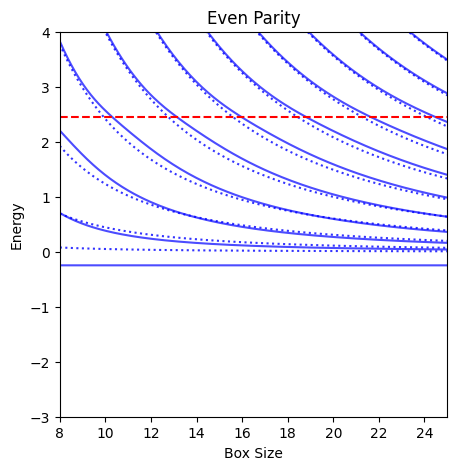

In [283]:
plt.figure(figsize=(5, 5))
for i in range(0,40,2):  
    
    points = [energies[i] for energies in V_odd_energy_points]
    plt.plot(box_size, 100+ np.array(points), c = "blue", alpha = 0.7)
    
    points = [energies[i] for energies in odd_energy_points]
    plt.plot(box_size, 100+ np.array(points), c = "blue", ls = "dotted", alpha = 0.8)#, marker='o', label=f'Energy {i+1}')

plt.title("Even Parity")
plt.xlabel("Box Size")
plt.ylabel("Energy")
#plt.grid(True)
plt.ylim(-3,4)
plt.xlim(8,25)
plt.axhline(y =2.454, c = "red", ls = "--", lw = 1.5 )
plt.show()

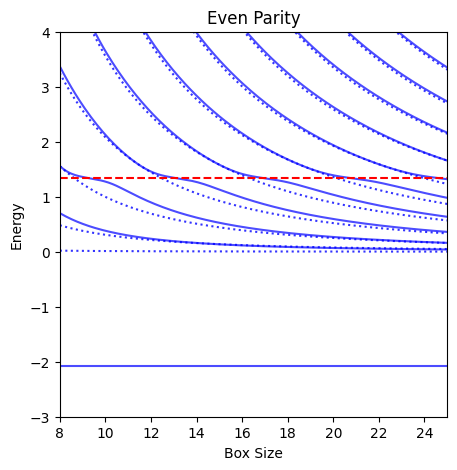

In [282]:
plt.figure(figsize=(5, 5))
for i in range(0,40,2):  
    
    points = [energies[i] for energies in V_even_energy_points]
    plt.plot(box_size, 100+ np.array(points), c = "blue", alpha = 0.7)
    
    points = [energies[i] for energies in even_energy_points]
    plt.plot(box_size, 100+ np.array(points), c = "blue", ls = "dotted", alpha = 0.8)#, marker='o', label=f'Energy {i+1}')

plt.title("Even Parity")
plt.xlabel("Box Size")
plt.ylabel("Energy")
#plt.grid(True)
plt.ylim(-3,4)
plt.xlim(8,25)
plt.axhline(y =1.3352, c = "red", ls = "--", lw = 1.5 )
plt.show()

Text(0.5, 1.0, '4th Scattering state')

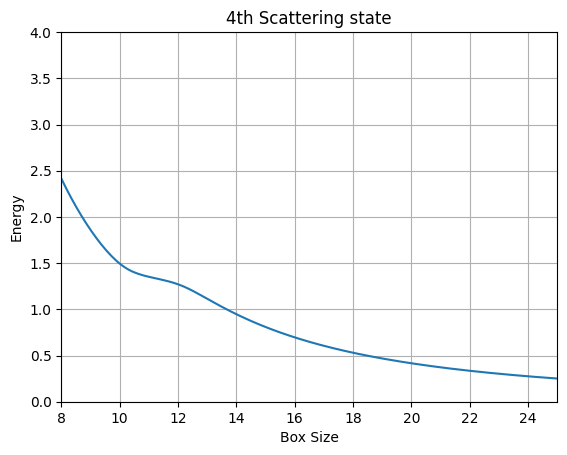

In [285]:
n= 5
points = [energies[n] for energies in V_even_energy_points]
W = CS(box_size, 100+ np.array(points))
plt.ylim(0,4)
plt.xlim(8,25)
plt.plot(box_size, W(box_size))
plt.grid()
plt.xlabel("Box Size")
plt.ylabel("Energy")
plt.title(f"{n-1}th Scattering state")

Text(0.5, 1.0, 'Derivative of 4th Scattering state w.r.t L')

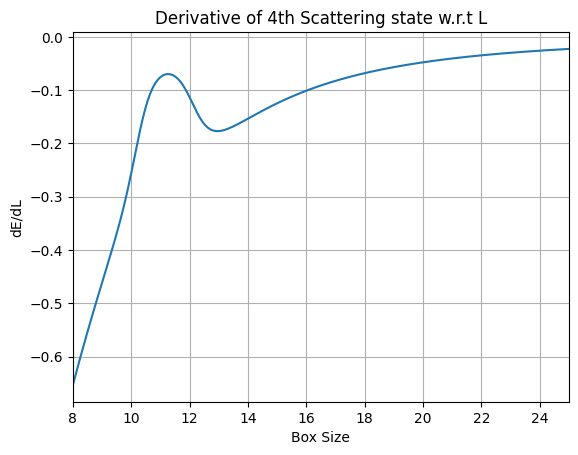

In [286]:
W = CS(box_size, 100+ np.array(points)).derivative()
#plt.ylim(0,4)
plt.xlim(8,25)
plt.plot(box_size, W(box_size))
plt.grid()
plt.xlabel("Box Size")
plt.ylabel("dE/dL")
plt.title(f"Derivative of {n-1}th Scattering state w.r.t L")

In [287]:
points = np.array(points)
#points[np.argmax(np.abs(W(box_size)))]+100


In [290]:
W = CS(box_size, 100+ np.array(points)).derivative(2)
maxima = np.where(np.diff(np.sign(W(box_size))) < 0)[0]


print("Energy at Maxima = ",points[maxima] +100, "Original Resonance at = 1.3352")

Energy at Maxima =  [1.33434677] Original Resonance at = 1.3352


Text(0.5, 1.0, '(Scattering State - Scattering State at V = 0) vs L')

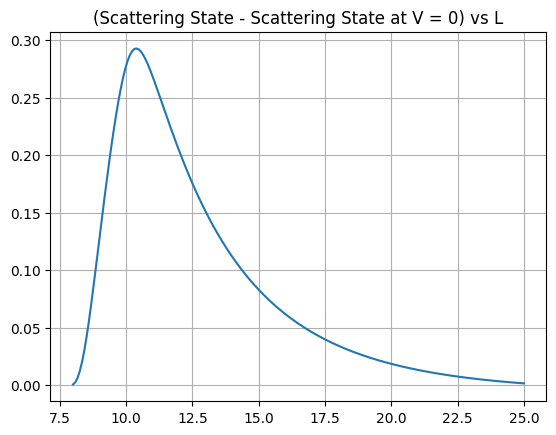

In [291]:
points = [energies[4] for energies in V_even_energy_points]
point = [energies[4] for energies in even_energy_points]
Wp = CS(box_size, np.array(points) - np.array(point) )

#plt.ylim(-3,4)
#plt.xlim(8,25)
plt.plot(box_size, Wp(box_size))
plt.grid()
plt.title("(Scattering State - Scattering State at V = 0) vs L")

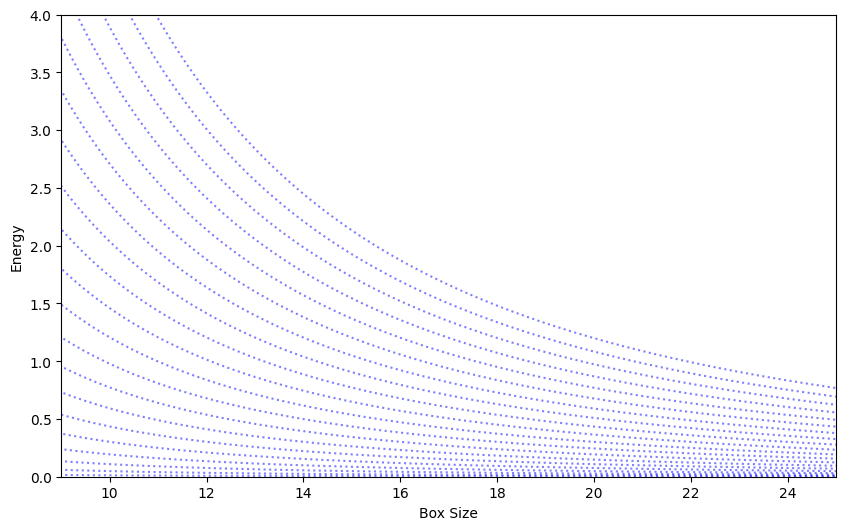

In [75]:
plt.figure(figsize=(10, 6))
for i in range(20):  
    points = [energies[i] for energies in energy_points]
    plt.plot(box_size, 100+ np.array(points), c = "blue", ls = "dotted", alpha = 0.5)#, marker='o', label=f'Energy {i+1}')
plt.xlabel("Box Size")
plt.ylabel("Energy")
#plt.grid(True)
plt.ylim(0,4)
plt.xlim(9,25)
plt.show()

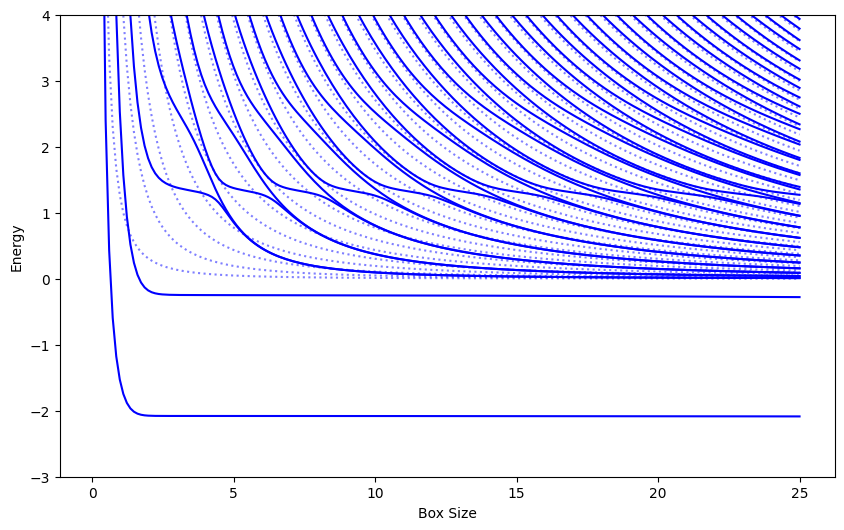

In [94]:
plt.figure(figsize=(10, 6))
for i in range(0,70):  
    
    points = [energies[i] for energies in V_energy_points]
    plt.plot(box_size, 100+ np.array(points), c = "blue")
    
    points = [energies[i] for energies in energy_points]
    plt.plot(box_size, 100+ np.array(points), c = "blue", ls = "dotted", alpha = 0.5)#, marker='o', label=f'Energy {i+1}')
plt.xlabel("Box Size")
plt.ylabel("Energy")
#plt.grid(True)
plt.ylim(-3,4)
#plt.xlim(8,25)
plt.show()


In [217]:

#from scipy.special import lambertw as lamb
from scipy.misc import derivative
from scipy.interpolate import CubicSpline as CS
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import scipy as sy
import pandas as pd
import mpmath as mp

In [218]:
def Vpot(r,V0):
    return (r**4 -V0)*np.exp(-r*r/2.)   #-V0*np.exp(-(r)**2) + 2*np.exp(-(r))   -V0*np.exp(-r*r/2) + np.exp(r)                                               

def rpos(Eval, V0):
    return   np.sqrt(np.log(-V0/Eval))

def odeeqns(r, y, Mr, l, El, V0):
    theta, omega = y
    return [omega, -2.*Mr*(El-(Vpot(r,V0) + l*(l+1)/r/r/(2*Mr)))*theta]

In [219]:
def jn1(n, x):

    if np.isscalar(x):
        return np.sin(x) / x**(n+1)
    else:
        result = np.zeros_like(x, dtype=float)
        mask = (x != 0)
        result[mask] = np.sin(x[mask]) / x[mask]**(n+1)
        result[~mask] = 1 if n == 0 else 0  # Define the limit at x=0
        return result

def yn1(n, x):
    if np.isscalar(x):
        return -np.cos(x) / x**(n+1)
    else:
        result = np.zeros_like(x, dtype=float)
        mask = (x != 0)
        result[mask] = -np.cos(x[mask]) / x[mask]**(n+1)
        result[~mask] = -1 if n == 0 else 0  # Define the limit at x=0
        return result

In [220]:
y0=[0.,1.]
r=np.linspace(0.001,12.,1500)
Mr=1.
l=0
r_span = (0.001,12.)

In [221]:
V0 = 3.#Varray[140]



In [222]:
k = []
Elvls = []
delta = []
for iEdel in np.linspace(0,3600.,num=400):
    El=iEdel/800.+0.001
    Elvls.append(El)

    usol = solve_ivp(odeeqns, r_span,  y0, t_eval= r, args=(Mr, l, El, V0),)

    #ufunc=CS(usol.t, -usol.y[0])
    Rfunc=CS(usol.t[1:], np.lib.scimath.log(usol.y[0][1:]/usol.t[1:])).derivative()

    #Rvals = Rfunc(usol.t)
    ra = 8.
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    def jnfn1(x):
        return jn1(l, pmom * x)  

    def ynfn1(x):
        
        return yn1(l, pmom * x)

    num = ynfn1(ra) * Rfunc(ra) - derivative(ynfn1, ra, dx=0.00001)
    den = jnfn1(ra) * Rfunc(ra) - derivative(jnfn1, ra, dx=0.00001)
    k.append(pmom)
    x = mp.atan(mp.re(den / num))  # Rely on mp.re for real part
    delta.append(x)    #np.where(x < 0, np.pi + x, x)) 

delta = np.array(delta)
Elvls = np.array(Elvls)

C:\Users\dell\AppData\Local\Temp\ipykernel_19588\4257753081.py:23: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  num = ynfn1(ra) * Rfunc(ra) - derivative(ynfn1, ra, dx=0.00001)
C:\Users\dell\AppData\Local\Temp\ipykernel_19588\4257753081.py:24: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  den = jnfn1(ra) * Rfunc(ra) - derivative(jnfn1, ra, dx=0.00001)


Text(0.5, 1.0, 'Glitch still there, even by using special functions manually')

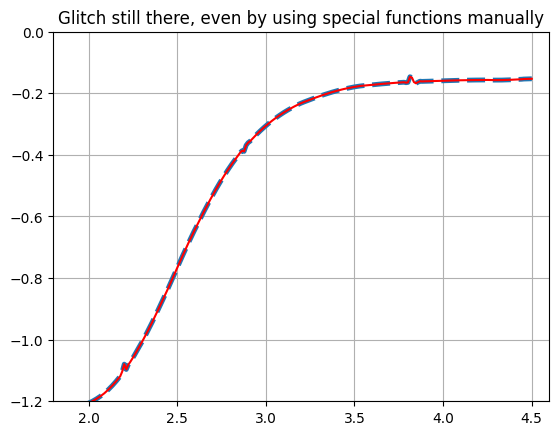

In [292]:
#plt.ylim(0,3.2)
plt.xlim(0.,4.5)
plt.plot(Elvls, delta, lw=3.5, ls= "--")
plt.grid()
p= CS(Elvls, delta)
plt.xlim(1.8,4.6)
plt.ylim(-1.2,0.0)
plt.plot(Elvls, p(Elvls), c="red")
plt.title("Glitch still there, even by using special functions manually")